[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/blog/blob/master/076_pbdl_intro/076_pbdl_intro.ipynb)

# *Physics-Based Deep Learning*

## Introducción

Este es el primero en una serie de posts en los que aprenderemos sobre [**PBDL**](https://physicsbaseddeeplearning.org/intro.html): *Physics-Based Deep Learning*, o el uso del *Deep Learning* (redes neuronales) para simulación física. En concreto, nos centraremos en  [**CFD**](https://es.wikipedia.org/wiki/Mec%C3%A1nica_de_fluidos_computacional): *Computational Fluid Dynamics*, el campo de la física que se enfoca en la simulación de fluidos para aplicaciones de aerodinámica, combustión, etc. Te advierto que nos vamos a alejar del *machine learning* tradicional para explorar un nuevo campo, el del uso de las redes neuronales para aproximar soluciones a ecuaciones diferenciales. Es posible que en algunos momentos te preguntes: ¿es esto realmente *machine learning*? Te entiendo. Aún así, creo firmemente que el campo del *PBDL* revolucionará la manera en la que simulamos la naturaleza en los próximos años, de la misma manera que el *Deep Learning* ha revolucionado (y lo sigue haciendo) tantos otros campos de la ciencia, como por ejemplo el [plegado de proteinas](https://deepmind.com/blog/article/AlphaFold-Using-AI-for-scientific-discovery).

El campo del *PBDL* es una disciplina relativamente nueva e inexplorada que se basa el uso de redes neuronales para sustituir (o complementar) métodos numéricos "tradicionales" utilizados desde hace años para simular los diferentes procesos físicos que rigen nuestra naturaleza (desde el comportamiento de nuestra atmósfera hasta el movimiento de estrellas y galaxias). Estos procesos pueden ser descritos, en la mayoría de ocasiones, mediante ecuaciones matemáticas. Resolver estas ecuaciones nos permite calcular, por ejemplo, la distribución de presión sobre una superficie aerodinámica (lo cual es muy útil a la hora de diseñar aviones más eficientes, entre muchas otras aplicaciones). Sin embargo, como te podrás imaginar, estas ecuaciones suelen ser muy difíciles de resolver y, en la mayoría de situaciones, ni siquiera pueden ser resueltas de manera analítica. Es aquí donde entran en juego los métodos numéricos, técnicas que nos permiten aproximar soluciones a estas ecuaciones que si bien no son exactas son lo suficientemente precisas para su uso en aplicaciones reales. Tradicionalmente, métodos numéricos de este estilo requieren de grandes recursos computacionales (es por este motivo que tenemos "superordenadores"). Por lo que cualquier avance en el campo que nos permita encontrar soluciones más rápidas y baratas supone una revolución. Creo que el campo del *PBDL* será la siguiente revolución en este campo. De hecho, este fue el motivo por el que me adentré en el mundo del *Deep Learning*, persiguiendo la idea de que usar [redes neuronales para aproximar soluciones a ecuaciones diferenciales](https://arxiv.org/abs/1912.04737) podía ser una buena idea.

> Recientemente se ha publicado este [libro](https://physicsbaseddeeplearning.org/intro.html) sobre *PBDL*. No dudes en consultarlo para aprender más !

## *Computational Fluid Dynamics*


Dentro del gran abanico de aplicaciones de la física computacional, la mecánica de fluidos computacional se encarga del estudio del comportamiento de fluidos, principalmente mediante la resolución de las ecuaciones de [Navier-Stokes](https://es.wikipedia.org/wiki/Ecuaciones_de_Navier-Stokes). Esto tiene un uso muy importante en el diseño de aeronaves, coches (muy importante en coches eléctricos), previsión meteorológica y análisis de la evolución de contaminantes, etc. 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/X-43A_%28Hyper_-_X%29_Mach_7_computational_fluid_dynamic_%28CFD%29.jpg/1024px-X-43A_%28Hyper_-_X%29_Mach_7_computational_fluid_dynamic_%28CFD%29.jpg)

Como ya he comentado anteriormente, resolver estas ecuaciones de manera analítica es imposible y su resolución numérica require de grandes recursos computacionales. Aún así, cada vez es más extendido su uso. En el caso del sector aeronáutico la alternativa es el uso de túneles de viento, lo cual es todavía más caro y lento. Poder diseñar vehículos con software de diseño 3d por ordenador, simular su comportamiento en varias condiciones e iterar su diseño hasta encontrar la geometría óptima en entornos virtuales es una gran ventaja. Creo que el uso del *Deep Learning* para *CFD* supondrá una revolución y acelerará, a la vez que abaratará, todo este proceso dando como resultado vehículos más eficientes, que viajen más rápido consumiendo y contaminando menos. 

> Si quieres aprender más sobre *CFD* te recomiendo echarle un vistazo a mi [tesis doctoral](https://www.tesisenred.net/handle/10803/667041#page=1) 🤗

## Leyes de Conservación

Iniciamos nuestro viaje en el campo del *PBDL* viendo el primer ejemplo de ecuación diferencial que vamos a resolver, primero con métodos numéricos tradicionales y luego con redes neuronales. Nuestro objetivo final es el de resolver las ecuaciones de Navier-Stokes, las cuales se agrupan dentro de las *leyes de conservación*. Una ley de conservación explica la evolución en el tiempo, $t$, y el espacio, $x$, de una *variable conservativa*. Un ejemplo muy simple es la evolución de la masa, $m$, de un fluido en un dominio unidimensional.

$$
m(t)  = \int_{x_1}^{x_2} \rho(x, t) dx
$$

En este caso, la magnitud conservativa es la **densidad**, $\rho$. Asumiendo que ni se crea ni se destruye masa, su evolución, $m(t)$, se deberá únicamente a la cantidad de fluido que esté entrando y saliendo el dominio a través de la entrada, en $x_1$, y la salida, en $x_2$ (lo que llamamos el flujo, $F$).

$$
\frac{\partial}{\partial t} \int_{x_1}^{x_2} \rho(x, t) dx = F_1(t) - F_2(t)
$$

De conocer la velocidad del fluido, podríamos calcular estos flujos como $f(\rho(x,t)) = u(x,t)\rho(x,t)$.

$$
\frac{\partial}{\partial t} \int_{x_1}^{x_2} \rho(x, t) dx = f(\rho(x_1,t)) - f(\rho(x_2,t))
$$

Manipulando esta ecuación podemos derivar la siguiente ecuación diferencial

$$
\frac{\partial}{\partial t} \int_{x_1}^{x_2} \rho(x, t) dx = - \int_{x_1}^{x_2} \frac{\partial}{\partial x} f(\rho(x,t)) dx
$$

Que, reordenando, quedaría como

$$
\int_{x_1}^{x_2} \left[ \frac{\partial}{\partial t} \rho(x, t) + \frac{\partial}{\partial x} f(\rho(x,t)) \right] dx = 0
$$

Y, debido a que esta integral tiene que ser cero para todos los valores de $x_1$ y $x_2$ 

$$
\frac{\partial}{\partial t} \rho(x, t) + \frac{\partial}{\partial x} f(\rho(x,t)) = 0
$$

Esta es la formulación básica de la ecuación de **conservación de la masa**. La forma general para una variable conservativa cualquiera se podría escribir como

$$
\frac{\partial}{\partial t} \phi(x, t) + \frac{\partial}{\partial x} f(\phi(x,t)) = 0
$$

O, de manera más compacta, simplemente

$$
\phi_t + f(\phi)_x = 0
$$

## Métodos de Volúmenes Finitos

Existen multitud de métodos numéricos para resolver ecuaciones diferenciales (diferencias finitas, elementos finitos, métodos de Galerkin, ...). Para la resolución de ecuaciones de conservación, lo que nos interesa a nosotros, el uso de métodos de volúmenes finitos es el más extendido debido a sus propiedades favorables. 

Este método está basado en la discretización del dominio de interés en el que queremos resolver nuestra ecuación en una serie de celdas en las cuales representaremos nuestra solución de manera promediada.

$$
\overline{\phi}(x^k, t) = \frac{1}{h^k} \int_k \phi(x, t) dx
$$

Y para satisfacer la ecuación diferencial se debe cumplir que

$$
h^k \frac{\partial \overline{\phi}(x^k)}{\partial t} = f(x^{k - 1/2},t) - f(x^{k + 1/2},t)
$$

Lo cual requerirá el cálculo del flujo $f(x^{k \pm 1/2}) = F(\phi^k, \phi^{k \pm 1})$.

## La ecuación de convección 1D

Vamos a ver nuestro primer ejemplo de ecuación diferencial: la ecuación de convección 1D.

$$
\phi_t + u \phi_x = 0
$$

En este caso, la variable conservativa es $\phi(x, t)$ y el flujo es $f(\phi(x,t)) = u \phi(x, t)$ donde $u$ es la velocidad, un valor escalar constante. Esta ecuación es muy útil por varios motivos. En primer lugar, considerando condiciones de contorno periódicas, tiene solución analítica

$$
\phi(x,t) = \phi_0(x - ut)
$$

donde $\phi_0$ es la condición inicial. A grandes rasgos, la condición inicial se propagará en $x$ a la velocidad $u$. Esto convierte a la ecuación de convección 1D como un perfecto benchmark para probar diferentes métodos numéricos.

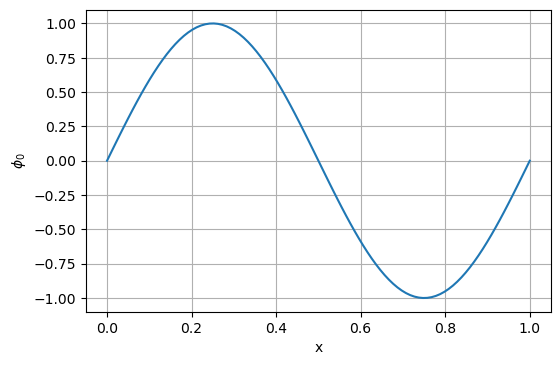

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.linspace(0,1,100)
p = np.sin(2*math.pi*x)

plt.figure(dpi=100)
plt.plot(x, p)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi_0$')
plt.show()

In [2]:
from matplotlib import animation, rc
rc('animation', html='html5')

def update(i):
    ax.clear()
    ax.plot(x, ps[i], "b")
    ax.set_xlabel('x')
    ax.set_ylabel('$\phi$')
    ax.set_title(f't = {ts[i]:.3f}')
    ax.grid(True)
    return ax

def compute_sol(x, u, t):
    return np.sin(2*math.pi*(x - u*t))

u = 1
ts = np.linspace(0,1,50)
ps = []
for t in ts:
    p = compute_sol(x, u, t)
    ps.append(p)

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(ps), interval=200)
plt.close()

anim

### Resolución con métodos de volúmenes finitos

Lo primero que necesitamos para resolver la ecuación es discretizar nuestro dominio en un conjunto de celdas.

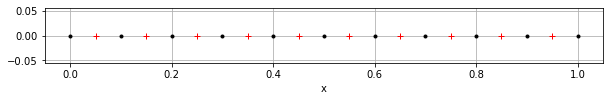

In [3]:
L, N, u = 1., 10, 1.
dx, dt = L / N, (L / N) / u

f = np.linspace(0,L,N+1) # caras
c = np.linspace(0.5*dx,L-0.5*dx,N) # celdas

plt.figure(figsize=(10,1))
plt.plot(f, np.zeros(N+1), '.k')
plt.plot(c, np.zeros(N), '+r')
plt.grid(True)
plt.xlabel('x')
plt.show()

Ahora, nuestra condición inicial estará definida en cada celda como el valor en su centroide (técnicamente deberíamos calcular su integral volumétrica, pero esto no es necesario para nuestro objetivo).

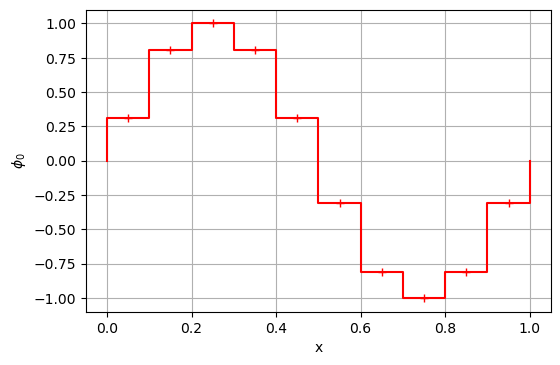

In [4]:
p0 = np.sin(2*math.pi*c)

plt.figure(dpi=100)
plt.plot(c, p0, '+r')
a, b = [0], [0]
for i in range(N):
    a += [c[i] - 0.5*dx, c[i], c[i] + 0.5*dx]
    b += [p0[i], p0[i], p0[i]]
a += [1]
b += [0]
plt.plot(a, b, '-r')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi_0$')
plt.show()

Como hemos visto antes, para calcular la evolución temporal de la variable conservativa necesitamos calcular su flujo a través de sus caras. Existen múltiples esquemas numéricos para aproximar el valor de la variable conservativa en la cara. Un par de esquemas simples son los conocidos como *upwind* (UDS), que usa el valor aguas arriba, y *central* (CDS) que usa el valor medio entre los valores a cada lado de la cara.

In [5]:
import numpy as np

def compute_flux(p, u, scheme='uds'):
    N = len(p)
    f = np.ones(N+1)
    for i in range(N+1):
        l, r = i-1, i
        if i == 0:
            l = N - 1
        elif i == N:
            r = 0
        if scheme == 'uds':
            f[i] = p[l] if u > 0 else p[r]
        elif scheme == 'cds':
            f[i] = 0.5*(p[l] + p[r])
        else:
            raise 'invalid scheme'
    return f

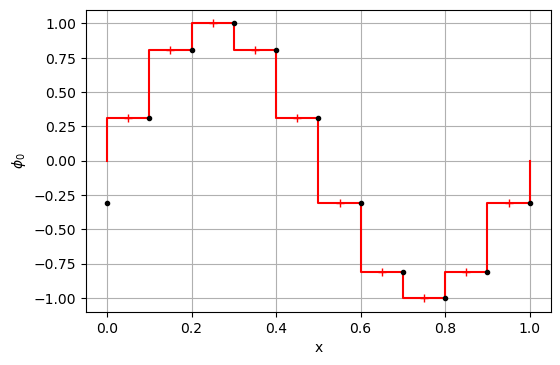

In [6]:
pf = compute_flux(p0, u, 'uds')

plt.figure(dpi=100)
plt.plot(c, p0, '+r')
plt.plot(a, b, '-r')
plt.plot(f, pf, '.k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi_0$')
plt.show()

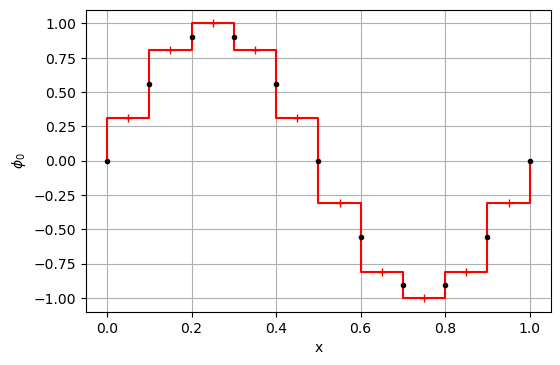

In [7]:
pf = compute_flux(p0, u, 'cds')

plt.figure(dpi=100)
plt.plot(c, p0, '+r')
plt.plot(a, b, '-r')
plt.plot(f, pf, '.k')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi_0$')
plt.show()

Para cada celda, calcularemos la variación de la magnitud conservativa como la cantidad que sale por la cara de la derecha menos la que entra por la cara izquierda (teniendo en cuenta el signo).

In [8]:
def sum_fluxes(pf):
	N = len(pf) - 1
	r = np.zeros(N)
	for i in range(N):
		r[i] = pf[i] - pf[i+1]
	return r

Por último, podemos actualizar el resultado usando un esquema de integración temporal, en este caso aplicamos un esquema sencillo de primer orden.

$$
    \frac{\partial \phi}{\partial t} \approx \frac{\phi^{n+1} - \phi^n}{t^{n+1} - t^{n}}
$$

In [9]:
def update_p(p0, r, dt, dx):
	N = len(p0)
	p = np.zeros(N)
	for i in range(N):
		p[i] = p0[i] + (dt/dx)*r[i]
	return p

In [10]:
p0 = np.sin(2*math.pi*c)
pf = compute_flux(p0, u)
r = sum_fluxes(pf)
p = update_p(p0, r, dt, dx)

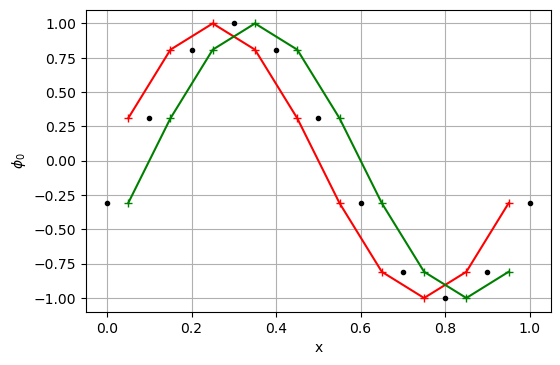

In [11]:
plt.figure(dpi=100)
plt.plot(c, p0, '+-r')
plt.plot(f, pf, '.k')
plt.plot(c, p, '+-g')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi_0$')
plt.show()

In [12]:
pf = compute_flux(p, u)
r = sum_fluxes(pf)
p1 = update_p(p, r, dt, dx)

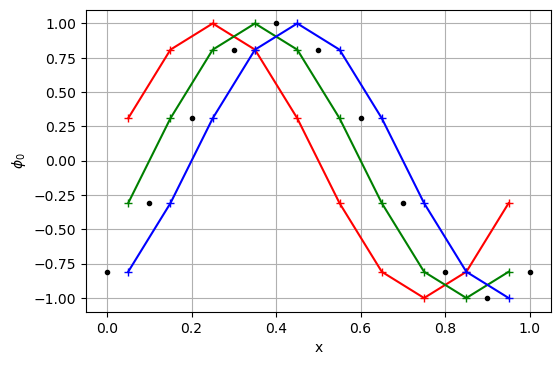

In [13]:
plt.figure(dpi=100)
plt.plot(c, p0, '+-r')
plt.plot(f, pf, '.k')
plt.plot(c, p, '+-g')
plt.plot(c, p1, '+-b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('$\phi_0$')
plt.show()

In [14]:
def run_sim(cfl = 1., scheme='uds'):
    p0 = np.sin(2*math.pi*c)
    ps = [p0]
    pa = [p0]
    ts = [0]
    t = 0
    dt = cfl * (L / N) / u
    while t + dt < 1.:
        t += dt
        pf = compute_flux(p0, u, scheme)
        r = sum_fluxes(pf)
        p = update_p(p0, r, dt, dx)
        ps.append(p)
        pa.append(compute_sol(c, u, t))
        ts.append(t)
        p0 = p.copy()
    return ps, pa, ts

In [15]:
def update(i):
    ax.clear()
    ax.plot(c, pa[i], "-b")
    ax.plot(c, ps[i], "+-r")
    ax.set_xlabel('x')
    ax.set_ylabel('$\phi$')
    ax.set_title(f't = {ts[i]:.3f}')
    ax.grid(True)
    return ax

In [16]:
ps, pa, ts = run_sim()

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(ps), interval=200)
plt.close()

anim

En este caso particular, resolver la ecuación de convección con un esquema UDS en una malla regular con un incremento temporal $dt = \frac{dx}{u}$ y velocidad constante es equivalente a la solución analítica. Esto es debido a que, bajo estas condiciones especiales, el flujo calculado es exacto. Esto, sin embargo, nunca será el caso ya que trabajaremos con mallas irregulares, la velocidad del fluido será variables, etc. En estos casos, el uso de un esquema UDS resulta en una solución artificalmente viscosa.

In [17]:
ps, pa, ts = run_sim(cfl=0.5)

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(ps), interval=200)
plt.close()

anim

El esquema CDS, por otro lado, acumulará errores debido a la aproximación que resultan en la divergencia de la simulación.

In [18]:
ps, pa, ts = run_sim(cfl=0.5, scheme="cds")

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(ps), interval=200)
plt.close()

anim

Para aliviar estos problemas se suele recurrir a esquemas numéricos de alto nivel (como por ejemplo los esquemas Runge Kutta para la integración temporal), el uso de mallas muy densas y saltos temporales muy pequeños con el objetivo de reducir al mínimo los errores de aproximación. Este es el principal motivo por el que resolver ecuaciones diferenciales con métodos numéricos suele requerir de grandes requisitos computacionales. La pregunta ahora es: ¿podemos mejorar esto con redes neuronales? La respuesta es ¡SÍ! 

## PINNs

El campo del *PBDL* abarca diferentes métodos. Vamos a empezar introduciendo el uso de *PINNs*, o *Physics informed Neural Networks*. En este caso, usaremos redes neuronales para aproximar la solución a ecuaciones diferenciales usando la misma ecuación como objetivo de aprendizaje (función de pérdida). Así pues, nuestra red neuronal recibirá a la entrada un conjunto de valores de las variables independientes, en nuestro ejemplo $x$ y $t$, y nos dará a la salida el valor de la variable conservativa, $\phi$ (la cual deberá satisfacer la ecuación diferencial).

![](./pinns.png)

In [28]:
import torch
import torch.nn as nn

# PRO TIP: usar `sin` como función de activación :)

class Sine(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x):
        return torch.sin(x)

mlp = nn.Sequential(
	nn.Linear(2, 100),
	Sine(), 
	nn.Linear(100, 100), 
	Sine(), 
	nn.Linear(100, 1)
)

In [32]:
N_STEPS = 1000
N_SAMPLES = 200
N_SAMPLES_0 = 100

optimizer = torch.optim.Adam(mlp.parameters())
criterion = torch.nn.MSELoss()
log_each = 100
mlp.train()
u = 1.
for step in range(1, N_STEPS+1):

    # optimize for PDE
    X = torch.rand((N_SAMPLES, 2), requires_grad=True) # N, (X, T)
    y_hat = mlp(X) # N, P 
    grads, = torch.autograd.grad(y_hat, X, grad_outputs=y_hat.data.new(y_hat.shape).fill_(1), create_graph=True, only_inputs=True)
    dpdx, dpdt = grads[:,0], grads[:,1]
    pde_loss = criterion(dpdt, - u*dpdx)

    # optimize for initial condition
    x = torch.rand(N_SAMPLES_0)
    p0 = torch.sin(2.*math.pi*x / L).unsqueeze(1)
    X = torch.stack([  # N0, (X, T = 0)
        x,
        torch.zeros(N_SAMPLES_0)
    ], axis=-1)
    y_hat = mlp(X) # N, P0 
    ini_loss = criterion(y_hat, p0)  
    
    # optimize for boundary conditions
    t = torch.rand(N_SAMPLES_0)
    X0 = torch.stack([  
        torch.zeros(N_SAMPLES_0),
        t
    ], axis=-1)
    y_0 = mlp(X0) 

    X1 = torch.stack([  
        torch.ones(N_SAMPLES_0),
        t
    ], axis=-1)
    y_1 = mlp(X1)
    bound_loss = criterion(y_0, y_1)

    # update
    optimizer.zero_grad()
    loss = pde_loss + ini_loss + bound_loss
    loss.backward()
    optimizer.step()
    
    if step % log_each == 0:
        print(f'{step}/{N_STEPS} pde_loss {pde_loss.item():.5f} ini_loss {ini_loss.item():.5f} bound_loss {bound_loss.item():.5f}')

100/1000 pde_loss 0.00055 ini_loss 0.00051 bound_loss 0.00149
200/1000 pde_loss 0.00046 ini_loss 0.00031 bound_loss 0.00102
300/1000 pde_loss 0.00042 ini_loss 0.00020 bound_loss 0.00064
400/1000 pde_loss 0.00044 ini_loss 0.00011 bound_loss 0.00041
500/1000 pde_loss 0.00043 ini_loss 0.00007 bound_loss 0.00020
600/1000 pde_loss 0.00028 ini_loss 0.00004 bound_loss 0.00011
700/1000 pde_loss 0.00014 ini_loss 0.00002 bound_loss 0.00004
800/1000 pde_loss 0.00010 ini_loss 0.00001 bound_loss 0.00002
900/1000 pde_loss 0.00007 ini_loss 0.00001 bound_loss 0.00001
1000/1000 pde_loss 0.00006 ini_loss 0.00000 bound_loss 0.00000


In [33]:
def run_mlp(N, dt):
    ps, pa, ts = [], [], []
    t = 0
    L = 1.
    dx = L / N
    c = np.linspace(0.5*dx,L-0.5*dx,N) # celdas
    c_t = torch.from_numpy(c).float()
    mlp.eval()
    while t < 1.:
        with torch.no_grad():
            X = torch.stack([  # N0, (X, T = 0)
                c_t,
                torch.ones(len(c_t))*t
            ], axis=-1)
            p = mlp(X)
        ps.append(p.numpy().ravel())
        pa.append(compute_sol(c, u, t))
        ts.append(t)
        t += dt
    return ps, pa, ts, c

In [34]:
ps, pa, ts, c = run_mlp(33, 0.05)

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(ps), interval=200)
plt.close()

anim

Obtenemos una solución muy precisa sin tener en cuenta ningún tipo de aspecto físico ni limitaciones en la discretización. Además, al tratarse de una red neuronal, podemos incluir los parámteros como inputs obteniendo así una aproximación a no solo un caso particular sino todo un abanico de soluciones que nos pueden ayudar a optimizar de manera muy rápida.

In [38]:
mlp = nn.Sequential(
    nn.Linear(3, 100), # x, t, u
    Sine(), 
    nn.Linear(100, 100), 
    Sine(), 
    nn.Linear(100, 1)
)

N_STEPS = 10000
N_SAMPLES = 200
N_SAMPLES_0 = 100

optimizer = torch.optim.Adam(mlp.parameters())
criterion = torch.nn.MSELoss()
log_each = 1000
mlp.train()

for step in range(1, N_STEPS+1):

    # optimize for PDE
    u = torch.rand(N_SAMPLES) 
    X = torch.stack([  # N, (X, T, U)
        torch.rand(N_SAMPLES),
        torch.rand(N_SAMPLES),
        u
    ], axis=-1)
    X.requires_grad = True
    y_hat = mlp(X) # N, P 
    grads, = torch.autograd.grad(y_hat, X, grad_outputs=y_hat.data.new(y_hat.shape).fill_(1), create_graph=True, only_inputs=True)
    dpdx, dpdt = grads[:,0], grads[:,1]
    pde_loss = criterion(dpdt, - u*dpdx)

    # optimize for initial condition
    x = torch.rand(N_SAMPLES_0)
    X = torch.stack([  # N0, (X, T = 0, U)
        x,
        torch.zeros(N_SAMPLES_0),
        torch.rand(N_SAMPLES_0)
    ], axis=-1)
    y_hat = mlp(X) # N, P0 
    p0 = torch.sin(2.*math.pi*x / L).unsqueeze(1)
    ini_loss = criterion(y_hat, p0)  
    
    # optimize for boundary conditions
    t = torch.rand(N_SAMPLES_0)
    u = torch.rand(N_SAMPLES_0)
    X0 = torch.stack([  
        torch.zeros(N_SAMPLES_0),
        t,
        u
    ], axis=-1)
    y_0 = mlp(X0) 

    X1 = torch.stack([  
        torch.ones(N_SAMPLES_0),
        t,
        u
    ], axis=-1)
    y_1 = mlp(X1)
    bound_loss = criterion(y_0, y_1)

    # update
    optimizer.zero_grad()
    loss = pde_loss + ini_loss + bound_loss
    loss.backward()
    optimizer.step()
    
    if step % log_each == 0:
        print(f'{step}/{N_STEPS} pde_loss {pde_loss.item():.5f} ini_loss {ini_loss.item():.5f} bound_loss {bound_loss.item():.5f}')

1000/10000 pde_loss 0.01402 ini_loss 0.01698 bound_loss 0.01018
2000/10000 pde_loss 0.00189 ini_loss 0.00022 bound_loss 0.00036
3000/10000 pde_loss 0.00125 ini_loss 0.00010 bound_loss 0.00019
4000/10000 pde_loss 0.00051 ini_loss 0.00009 bound_loss 0.00013
5000/10000 pde_loss 0.00045 ini_loss 0.00007 bound_loss 0.00012
6000/10000 pde_loss 0.00029 ini_loss 0.00006 bound_loss 0.00010
7000/10000 pde_loss 0.00031 ini_loss 0.00003 bound_loss 0.00005
8000/10000 pde_loss 0.00022 ini_loss 0.00003 bound_loss 0.00004
9000/10000 pde_loss 0.00022 ini_loss 0.00002 bound_loss 0.00004
10000/10000 pde_loss 0.00023 ini_loss 0.00002 bound_loss 0.00002


In [39]:
def run_mlp2(N, dt, u):
    ps, pa, ts = [], [], []
    t = 0
    L = 1.
    dx = L / N
    c = np.linspace(0.5*dx,L-0.5*dx,N) # celdas
    c_t = torch.from_numpy(c).float()
    mlp.eval()
    while t < 1.:
        with torch.no_grad():
            X = torch.stack([  # N0, (X, T = 0)
                c_t,
                torch.ones(len(c_t))*t,
                torch.ones(len(c))*u
            ], axis=-1)
            p = mlp(X)
        ps.append(p.numpy().ravel())
        pa.append(compute_sol(c, u, t))
        ts.append(t)
        t += dt
    return ps, pa, ts, c

In [46]:
ps, pa, ts, c = run_mlp2(33, 0.01231, 0.680981726)

fig = plt.figure(dpi=100)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(ps), interval=200)
plt.close()

anim

Voilà, tenemos una red neuronal que es capaz de darnos una solución muy buena a la ecuación de convección 1D. Esta solución es contínua y derivable, a diferencia de la solución numérica. Además, nos da resultados para cualquier valor de $u$ usado durante el entrenamiento (podríamos añadir más parámetros en los inputs si quisiésemos).

## Resumen

En este primer post sobre *PBDL* hemos introducido los conceptos básicos que vamos a desarrollar en los próximos posts. Nuestro objetivo será el de resolver ecuaciones diferenciales usando redes neuronales en vez de métodos numéricos tradicionales, con las ventajas y desventajas que ello conlleva. Hemos visto un primer ejemplo de resolución de la ecuación de convección 1D, usando volúmenes finitos y *PINNs*. Con el método de volúmenes finitos, necesitamos discretizar nuestro dominio en un conjunto de celdas en las que resolveremos la ecucación. Para ello tenemos que calcular los flujos en las caras de las celdas y usar un esquema de integración temporal. En función de los esquemas numéricos elegidos (tanto espaciales como temporales) nuestra solución se comportará de una manera u otra (echibiendo difusión artificial u oscilaciones que pueden hacer diverger nuestra simulación). Además, tenemos fuertes restricciones a nivel físico que dan como resultado la necesidad de mallas muy densas y saltos temorales pequeños para minimizar los errores. Por otro lado, el uso de *PINNs* no tienen ningún tipo de restricción y nos dan como resultado soluciones precisas, continuas y derivables. Además, al poder añadir los parámetros libreas como entradas a la red, podemos obtener soluciones para un rango de escenarios que podemos usar para estudios de optimización de manera muy eficiente. En futuros posts seguiremos explorando este nuevo y apasionante campo.